Q.6 (e): Unbinned Data: The power spectrum calculated from the FFT of the entire dataset captures all frequency components present in the data. Since we generated data from a normal distribution, the power spectrum should show a flat spectrum indicating white noise, as each frequency component should have roughly equal power.

Binned Data (Bartlett Method): By averaging the power spectrum over several bins (in this case, 5), we reduce the variance in the power estimates. This method is particularly useful for identifying underlying trends in the presence of noise. The Bartlett method effectively smooths the power spectrum, making it easier to identify dominant frequencies if any exist.

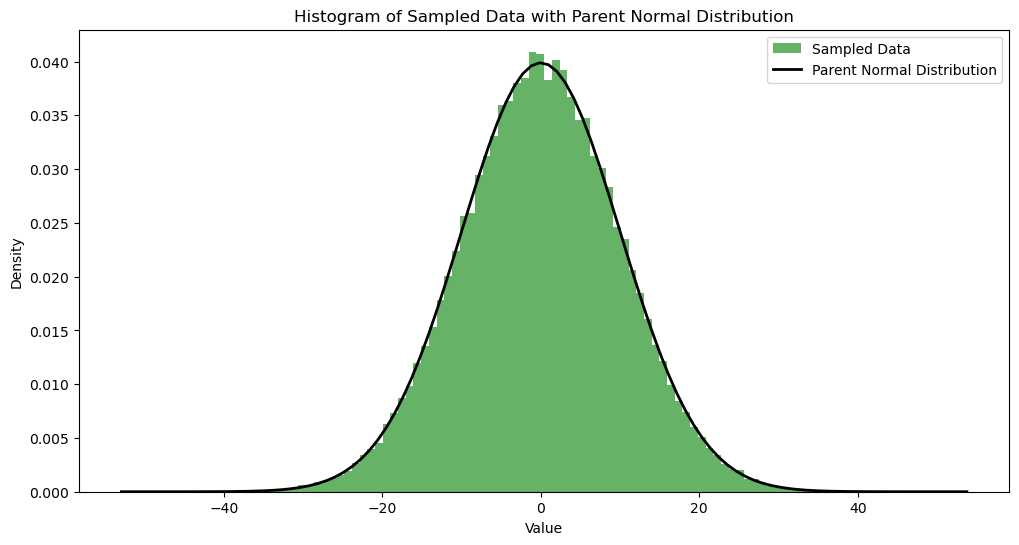

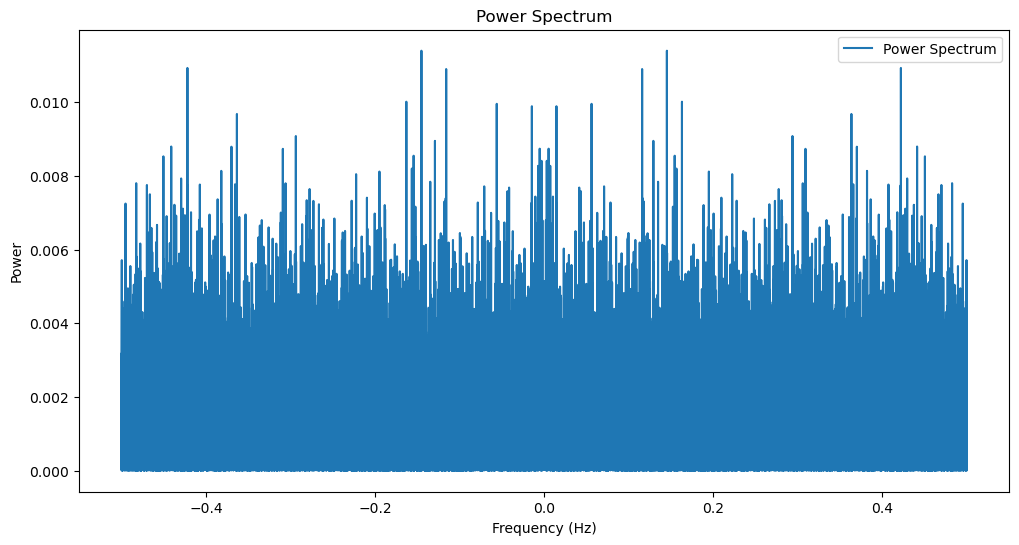

The Minimum and Maximum value of k (DFT frequencies) are:
Min value = -0.5
Max value = 0.49999000000000005
The Minimum and Maximum 'absolute' value of k (DFT frequencies) are:
Min value = 0.0
Max value = 0.5


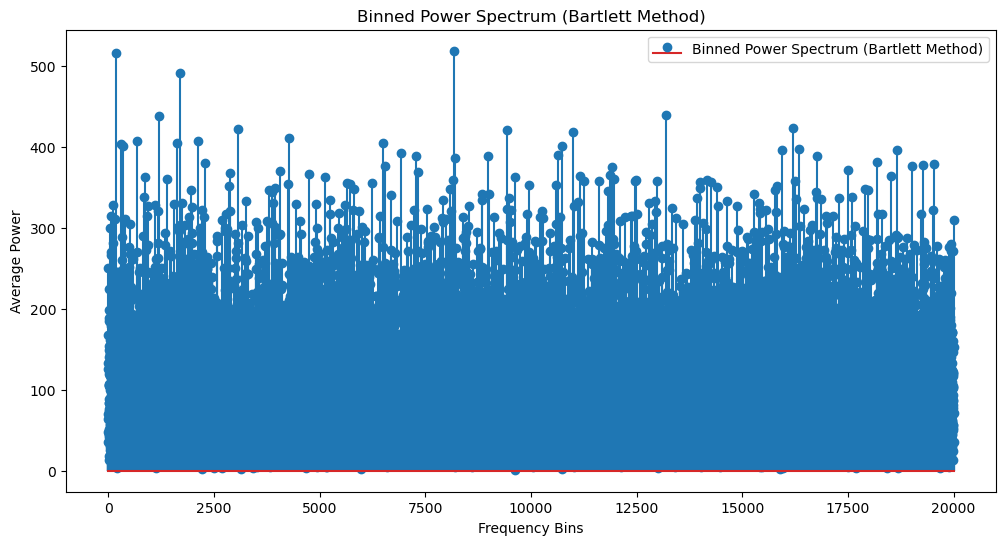

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy.fft as fft

# Step 1: Generate 100,000 random numbers from a normal distribution
mean = 0
std_dev = 10
sample_size = 100000
data = np.random.normal(mean, std_dev, sample_size)

# Step 2: Plot histogram of the sample
plt.figure(figsize=(12, 6))
count, bins, ignored = plt.hist(data, bins=100, density=True, alpha=0.6, color='g', label='Sampled Data')

# Plot the parent normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2, label='Parent Normal Distribution')

plt.title('Histogram of Sampled Data with Parent Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# Function to calculate power spectrum
def calc_pow_spec(data, binned=False, bin_size=0):
    if not binned:  # For unbinned data
        k = fft.fftshift(fft.fftfreq(len(data)))
        dft = fft.fftshift(fft.fft(data, norm='ortho'))
        spec = (1.0 / len(data)) * np.abs(dft)**2.0
        return [k, spec]
    else:  # For binned data
        if len(data) % bin_size == 0:
            spec = np.zeros(len(data) // bin_size, dtype=np.float64)
            data_bin = np.zeros(shape=(len(data) // bin_size, bin_size), dtype=np.float64)
        else:
            spec = np.zeros(len(data) // bin_size + 1, dtype=np.float64)
            data_bin = np.zeros(shape=(len(data) // bin_size + 1, bin_size), dtype=np.float64)
        k = 0
        for i in range(len(spec)):
            for j in range(bin_size):
                data_bin[i][j] = data[k]
                k = k + 1
                if k == len(data):
                    break
        for i in range(len(spec)):
            dft = fft.fftshift(fft.fft(data_bin[i], norm='ortho'))
            spec[i] = np.mean(np.abs(dft)**2.0)
        return spec

# Step 3: Calculate power spectrum
power_spec = calc_pow_spec(data)

# Step 4: Plot power spectrum
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(power_spec[0], power_spec[1], label='Power Spectrum')
ax.set_title('Power Spectrum')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power')
ax.legend()
plt.show()

# Calculate and print the minimum and maximum values of k
min_k = min(power_spec[0])
max_k = max(power_spec[0])
min_abs_k = min(np.abs(power_spec[0]))
max_abs_k = max(np.abs(power_spec[0]))

print(f"The Minimum and Maximum value of k (DFT frequencies) are:\nMin value = {min_k}\nMax value = {max_k}")
print(f"The Minimum and Maximum 'absolute' value of k (DFT frequencies) are:\nMin value = {min_abs_k}\nMax value = {max_abs_k}")

# Step 5: Calculate binned power spectrum using Bartlett method
bin_size = 5
binned_power_spec = calc_pow_spec(data, binned=True, bin_size=bin_size)

# Step 6: Plot binned power spectrum
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.stem(np.linspace(0, len(binned_power_spec), len(binned_power_spec)), binned_power_spec, markerfmt='o', linefmt='-', label='Binned Power Spectrum (Bartlett Method)')
ax.set_title('Binned Power Spectrum (Bartlett Method)')
ax.set_xlabel('Frequency Bins')
ax.set_ylabel('Average Power')
ax.legend()
plt.show()
